<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_67_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 67: K-Means Clustering - Clustering 1D and 2D Data

---






So far the Machine Learning algorithms which we have worked on are known as supervised learning algorithms. In supervised learning we teach the machine using labelled data. This means the training data is already tagged with the correct answer. Once the system is trained it is used to predict the outcome for the unknown data. Classification and Regression are examples of supervised learning. However, a lot of machine learning applications comes with **unlabelled data**.

Let's look a new problem statement to understand the unlabelled data. Here, we
have a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

From the following information, we need to segregate customers and categorise them in some form.

**Attribute Information:**

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`.

- `UnitPrice`: Unit price. Numeric, product price per unit in sterling.

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.


**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

**Note:** Since the dataset is a Microsoft Excel file, i.e., in the `xlsx` format, we need to use the `read_excel()` function of the Pandas module.


In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_excel("/content/online-retail-customers.xlsx")
customers_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


We can see that, the customers are not categorised in any way. A retail company would like to categorise their customers as high-value, mid-value or low-value customers or something similar that we don't have in the above dataset. Hence, from the above set of features, we need to figure out a way to categorise the customers.

For this purpose, we need to use a machine learning technique called **clustering**. Using clustering, we can categorise the customers in the above dataset as labels, say, $1, 2, 3, 4, \dots$

These labels will effectively serve as the target variable. Right now, we neither have feature variables nor the target variables to build a classification model to predict what customers are likely to buy more from retail a store.

Let's understand clustering now. Thereafter, we will come back to solve the above problem statement.


---

### Clustering

*Clustering* is the most common unsupervised learning technique.

**What is unsupervised learning?**
- In unsupervised learning, the machine uses unlabelled data and learns on itself without any supervision.
- The machine tries to find a pattern in the unlabelled data and gives a response.

Clustering is an unsupervised learning technique which is used to make groups of objects which are more related to each other than to other groups.

In clustering, we first partition the set of data into groups based on the similarity and then assign the labels to those groups. Also, it helps us to find out various useful features that can help in distinguishing between different groups. For example, finding out which target customers are more suitable for a particular product.

For the problem statement given above, we will perform the task of grouping the customer based on common interests and customise the marketing strategies for each group:  

<center>
  <img src="https://drive.google.com/uc?export=view&id=1tDnVJ0w7V87fSiZCHXXtqhyLVCiCRcMT" />
</center>

In the above image, you can see an illustration of customer segmentation. Suppose the marketing team of a company needs to identify target audience for a new product. A target audience is the specific group of customers who will most likely purchase your product or service.

Using clustering techniques, companies can divide the available customer base into different groups. From these groups, it would be easy to identify the segment of customers who can be the potential buyers of the product. This will eventually contribute in increasing the revenue of the company.


In this class, we will explore an unsupervised learning algorithm called **K-Means Clustering** with the help of a very simple example before solving the online retail customer segmentation problem





<center>
<img src="https://drive.google.com/uc?id=<1tDnVJ0w7V87fSiZCHXXtqhyLVCiCRcMT>/>
</center>


---

#### Activity 1: Clustering 1-Dimensional Dataset

Let us begin with a simple 1-dimensional dataset. Consider a dataset of 9 balls having following diameters:

`Diameters = [1.3, 4, 3.2, 1.5, 3, 9, 3.6, 8, 8.3]`

Our task is to categorise these balls into different groups or clusters based on their diameters.

The solution to this problem is straightforward. We will group balls having approximately equal or similar diameters in the same group. We will achieve this using K-Means clustering algorithm.

Let us first import the necessary Python modules and create a DataFrame consisting of only one column `Diameter`.


In [ ]:
#  Import the modules and generate the DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a DataFrame consisting of one column 'Diameters' having diameters of 9 balls.
balls_df = pd.DataFrame({'Diameter': [1.3, 4, 3.2, 1.5, 3, 9, 3.6, 8, 8.3]})
balls_df.head()

,Diameter
0,1.3
1,4.0
2,3.2
3,1.5
4,3.0


Now generate a scatter plot to visualise these diameter values. Plot the diameters on $X$-axis and fix the $Y$-axis values at `1`.







In [ ]:
np.ones(9)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

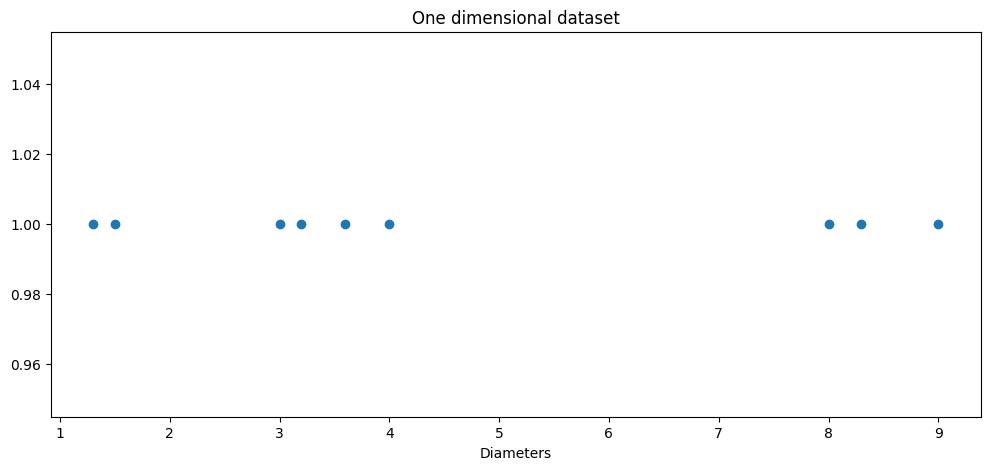

In [ ]:
# Check the distribution of ball_df DataFrame using scatter plot
plt.figure(figsize = (12, 5))
plt.scatter(balls_df["Diameter"], np.ones(9), label = "Ball Diameters")
plt.title("One dimensional dataset")
plt.xlabel("Diameters")
plt.show()

By simply looking at the scatter plot, we can say that there can be 3 groups/clusters of balls.

Now, let us create clusters for this 1D dataset using K-means. The syntax for using K-means algorithm is as follows:

**Syntax:** `sklearn.cluster.KMeans(n_clusters, random_state)`

Where,
- `n_cluster`: The number of clusters to form. The default value is `8`.
- `random_state`: An integer value for consistent results.


Follow the steps given below to perform K-means clustering:

1. Import `KMeans` class from `sklearn.clusters` module.

2. Create an object (say `kmeans_1d`) of the `KMeans` constructor and provide following inputs:

 - `n_clusters = 3`:  We are randomly selecting number of clusters as `3`. However, you need not always select 3 clusters.

 - `random_state = 2`

3. Call the `fit()` function using the object of  `KMeans` class and pass the corresponding DataFrame `balls_df` as input.

4. Get the predicted clusters for the data points by calling the `predict()` function on `kmeans_1d` and pass the `balls_df` DataFrame.

5. Print the labels obtained after using `predict()` function.

In [ ]:
#  Import scikit learn KMeans library and determine the clusters.
from sklearn.cluster import KMeans
kmeans_1d = KMeans(n_clusters = 3 ,random_state = 2)
kmeans_1d.fit(balls_df)
labels = kmeans_1d.predict(balls_df)
print(labels)

[0 2 2 0 2 1 2 1 1]


In [ ]:
balls_df

,Diameter
0,1.3
1,4.0
2,3.2
3,1.5
4,3.0
5,9.0
6,3.6
7,8.0
8,8.3


As you can see in the output, our 1D data is divided into 3 clusters where,
- The first cluster is labelled as `0`.
- The second cluster is labelled as `1`.
- The third cluster is labelled as `2`.

Each cluster has a center called as **centroid**. We will learn more about centroid in the next activity.

As we have three clusters, we will have three centroids. Use `cluster_centers_` attribute with `kmeans_1d` object to obtain these centroids.

In [ ]:
# Print the centroids
print(kmeans_1d.cluster_centers_)

[[1.4       ]
 [8.43333333]
 [3.45      ]]


In the above output, the K-Means estimator determined the cluster centers for the three clusters.

Let's visualise these clusters by plotting them  on a scatter plot using the steps given below:

1. Plot the `balls_df` DataFrame coloured by the `labels` by passing `c = labels` parameter inside the `scatter()` function as follows:

  `plt.scatter(balls_df, np.ones(9), c = labels)`

2. Plot the cluster centers or centroids on the scatter plot by plotting `kmeans_1d.cluster_centers_` on $x$-axis and `np.ones(3)` on $y$-axis.

  **Note:** We are using `np.ones(3)` as we have three cluster centers.

  To differentiate the datapoints from the centroids, pass `marker = *` while plotting the centroids. You can set the marker size as well for the cluster centres using the `s` parameter.



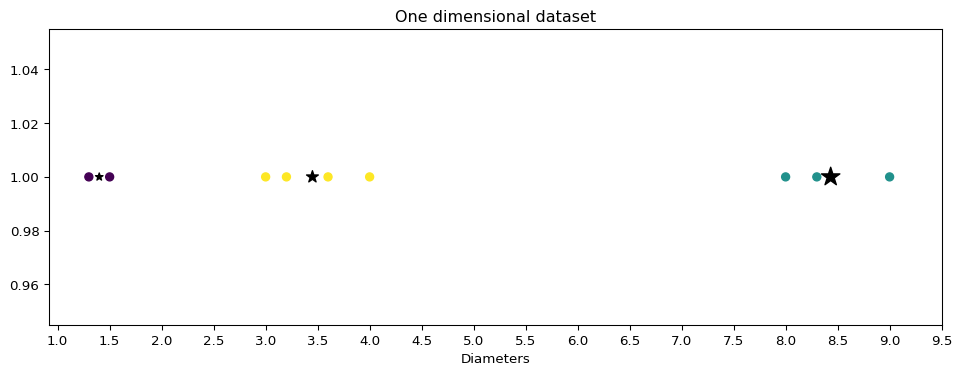

In [ ]:
# Plot the clusters and their centroids on a scatter plot.
plt.figure(figsize = (12, 4), dpi = 96)
plt.scatter(balls_df, np.ones(9), c = labels)
plt.scatter(kmeans_1d.cluster_centers_, np.ones(3), marker = '*',
            s = kmeans_1d.cluster_centers_ * 25, c = 'black'
            )
plt.title("One dimensional dataset")
plt.xlabel("Diameters")
plt.xticks(np.arange(1, 10, step = 0.5))
plt.show()

In the above plot, you may observe that we obtained three clusters with their respective cluster centers marked with $*$ mark.

- The purple coloured cluster with the centroid located at `1.4`.

- The yellow coloured cluster with the centroid located at `3.45`.

- The green coloured cluster with the centroid located at `8.43`.



---

#### Activity 2: Understanding K-Means Clustering

K-Means clustering is among the most popular and simplest unsupervised machine learning algorithms. The objective of K-means is simple: group similar data points together and discover underlying patterns.

To achieve this objective, K-Means looks for a fixed number  of clusters (`K`) in a dataset.


Here's the algorithm for us:

**Step 1: Choose $K$**

Select the number of clusters i.e $K$ to be identified. So if we choose $K = 3$,  we're going to look for three clusters in our dataset.

**Step 2: Select $K$ random points as centroids**

Next, we randomly select the centroid for each cluster. The centroid is nothing but the cluster centers. It is the arithmetic mean of the data points belonging to a clusters.

As the algorithm hasn't formed any clusters yet, so the initial centroids would be any random data points. Let’s say we want 3 clusters, so choose any 3 random data points as the cluster centroids.

**Step 3: Assign each data point to the nearest  centroid**

Once we have initialised the centroids, we assign each data point to the nearest cluster centroid.

**Step 4: Recompute the centroids**

Once all the data points to any of the cluster, compute the centroids of the newly formed clusters.

**Step 5: Repeat steps 3 and 4**

We then repeat steps 3 and 4 i.e. the step of computing the centroid and assigning all the data points to the nearest cluster based on their distance from the centroid.

**When does the algorithm stops running?**

K-means algorithm stops iterating when either the centroids of the newly formed clusters are not changing or the the data points remain in the same cluster even after multiple iterations.

Refer the following flowchart to understand the working of K-Means algorithm:
<center><img src="https://drive.google.com/uc?export=view&id=1OyZs9W1NoOyZ9K7yzB2EmOK_nF5YMCdX"/></center>



Let us now understand how K-Means performs clustering for the `Diameters` dataset.

`Diameters = [1.3, 4, 3.2, 1.5, 3, 9, 3.6, 8, 8.3]`

**Step 1:** Assume the number of clusters to be `3` i.e $K = 3$. You may choose any arbitrary value for $K$.

**Step 2:** Assume first three data points as the three centroids:
    - $\bar{c_1} = 1.3$
    - $\bar{c_2} = 4$
    - $\bar{c_3} = 3.2$

  **Note:** The initial centroid values are chosen arbitrarily. You can choose any other arbitrary centroid value.

**Step 3:** Next, we will assign each data point to their closest cluster.
  For example, consider the fourth data point `1.5`. The absolute distance of `1.5` from $\bar{c_1}$, $\bar{c_2}$ and $\bar{c_3}$ are:
    - $|1.5 - \bar{c_1}| = |1.5 - 1.3| = 0.2$
    - $|1.5 - \bar{c_2}| = |1.5 - 4| = 2.5$
    - $|1.5 - \bar{c_3}| = |1.5 - 3.2| = 1.7$



  As the absolute distance between `1.5` and $\bar{c_1}$ is the least, we will assign `1.5` to cluster $C_1$.

  Similarly, each data point will be assigned to their closest centroid. The following table shows the distance of each data point with each of the centroids.

  **First Iteration:**


  <img src="https://drive.google.com/uc?export=view&id=1xmojR2SMLlTldh8G423w-tK9CwZVpGZ3"/>





  Thus, the clusters obtained from the above table are:
  - $\bar{c_1} = \{1.3, 1.5\}$
  - $\bar{c_2} = \{4, 9, 3.6, 8, 8.3\}$
  - $\bar{c_3} = \{3.2, 3\}$

**Step 4:** After obtaining the newly formed clusters, update the value of cluster centers i.e the centroids. The *cluster center* is the arithmetic mean of all the points belonging to the cluster. (that is why, this algorithm is named as k-means)
 $$\bar{c_1} = \frac{1.3 + 1.5}{2} = 1.4$$

  $$\bar{c_2} = \frac{4 + 9 + 3.6 + 8 + 8.3}{5} = 6.58$$

  $$\bar{c_3} = \frac{3.2 + 3}{2} = 3.1$$

  Thus, the new centroids are:
  - $\bar{c_1}= 1.4$
  - $\bar{c_2}=6.58$
  -  $\bar{c_3}=3.1$

This completes the first iteration. Similarly, now again assign each data point to either of the cluster by calculating their absolute distance from the newly obtained centroids.

Thus, the distance between each data point with the new centroids $\bar{c_1}= 1.4$, $\bar{c_2}=6.58$, $\bar{c_3}=3.1$ are as given below:

  **Second Iteration:**

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/1a933ee9-754b-4543-9ff3-87f3e6d523d5.PNG"/>

Thus, the clusters obtained from the above table are:
  - $C_1 = \{1.3, 1.5\}$
  - $C_2 = \{9, 8, 8.3\}$
  - $C_3 = \{4, 3.2, 3, 3.6\}$

After computing the arithmetic mean of the above clusters, we obtained following new cluster centroids after second iteration:

  - $\bar{c_1}= 1.4$
  - $\bar{c_2}=8.43$
  - $\bar{c3}=3.45$

Similarly, again assign each data point to either of the cluster by calculating their absolute distance from the newly obtained centroids.

Thus, the distance between each data point with the new centroids  $\bar{c_1}= 1.4$, $\bar{c_2}=8.43$, $\bar{c_3}=3.45$  are as given below:

 **Third Iteration:**

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/7d9d774e-7643-49a4-968e-9a73ad0c7568.PNG"/>

Thus, the clusters obtained from the above table are:
  - $C_1 = \{1.3, 1.5\}$
  - $C_2 = \{9, 8, 8.3\}$
  - $C_3 = \{4, 3.2, 3, 3.6\}$

Refer the table below which shows the clusters obtained after each iteration:

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/4fd0743b-f9ee-49ab-8a81-700af9025636.PNG"/>

You will observe that the data points remain in the same cluster after second iteration. This means that we have obtained our final clusters having following centroid values:
  - $\bar{c_1}= 1.4$
  - $\bar{c_2}=8.43$
  - $\bar{c_3}=3.45$

Note that we had obtained same centroid values using `cluster_centers_` property on `kmeans_1d` object.


In [ ]:
# Print the centroids again using 'kmeans_1d' object.
print(kmeans_1d.cluster_centers_)

[[1.4       ]
 [8.43333333]
 [3.45      ]]


---

#### Activity 3: Clustering 2-Dimensional Dataset

Let's create a random dataset in 2-dimensional space using the steps given below:

1. Generate a 2D array of 100 rows and 2 columns. This array must consists of negative random numbers.
2. Now replace last 50 rows of this array with 50 rows of positive random numbers.


**Note:** Use `random.rand()` function of `numpy` module for generating random numbers. Also use `random.seed()` function of `numpy` module to obtain same random numbers on multiple execution of code.

In [ ]:
np.random.rand(2, 2)

array([[0.02914932, 0.37289288],
       [0.09587331, 0.19696432]])

In [ ]:
#  Generate random data points for 2D clustering
np.random.seed(2)
two_dim = - 1 * np.random.rand(100, 2)
two_dim[50:100, :] = np.random.rand(50, 2)
print(two_dim)

[[-0.4359949  -0.02592623]
 [-0.54966248 -0.43532239]
 [-0.4203678  -0.33033482]
 [-0.20464863 -0.61927097]
 [-0.29965467 -0.26682728]
 [-0.62113383 -0.52914209]
 [-0.13457995 -0.51357812]
 [-0.18443987 -0.78533515]
 [-0.85397529 -0.49423684]
 [-0.84656149 -0.07964548]
 [-0.50524609 -0.0652865 ]
 [-0.42812233 -0.09653092]
 [-0.12715997 -0.59674531]
 [-0.226012   -0.10694568]
 [-0.22030621 -0.34982629]
 [-0.46778748 -0.20174323]
 [-0.64040673 -0.48306984]
 [-0.50523672 -0.38689265]
 [-0.79363745 -0.58000418]
 [-0.1622986  -0.70075235]
 [-0.96455108 -0.50000836]
 [-0.88952006 -0.34161365]
 [-0.56714413 -0.42754596]
 [-0.43674726 -0.77655918]
 [-0.53560417 -0.95374223]
 [-0.54420816 -0.08209492]
 [-0.3663424  -0.8508505 ]
 [-0.40627504 -0.02720237]
 [-0.24717724 -0.06714437]
 [-0.99385201 -0.97058031]
 [-0.80025835 -0.60181712]
 [-0.76495986 -0.16922545]
 [-0.29302323 -0.52406688]
 [-0.35662428 -0.04567897]
 [-0.98315345 -0.44135492]
 [-0.50400044 -0.32354132]
 [-0.25974475 -0.38688989]
 

Next, create a scatter plot to visualise the above 2D array. For this,

1. Pass the first column of the above array for $x$-axis.
2. Pass the second column of the above array for $y$-axis.



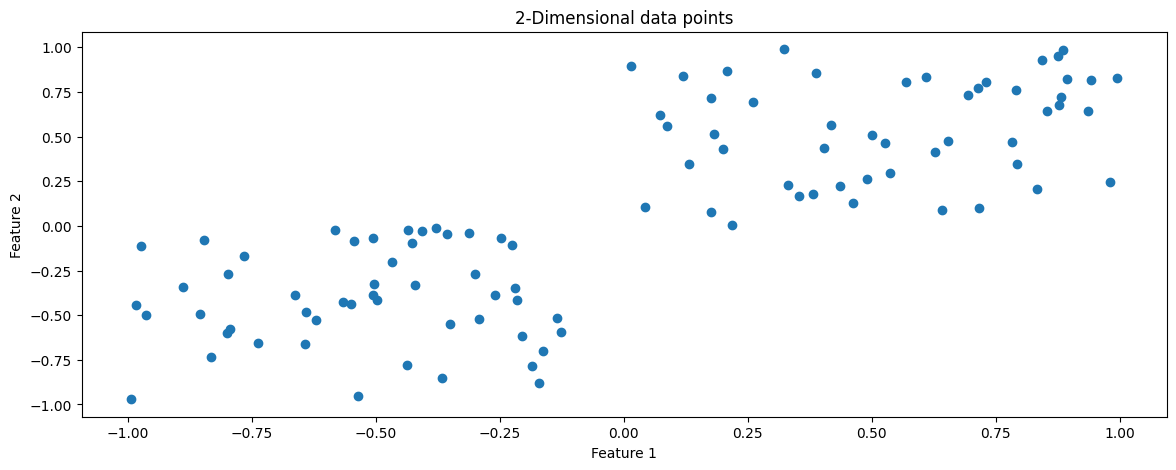

In [ ]:
#  Plot the 2D array.
plt.figure(figsize = (14, 5))
plt.scatter(two_dim[ :, 0], two_dim[ :, 1])
plt.title('2-Dimensional data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Let us apply K-Means clustering to the above generated 2D dataset. From the scatter plot, it is clearly visible that two clusters can be obtained for this dataset i.e `k = 2`.

**Note:** For a real world dataset, it is not always possible to decide correct value of `k` (number of clusters) by simply looking at the graph. There are several methods to find the best value of `k`. We will discuss them in the upcoming section.


Now, create an object (say `kmeans_2d`) of the `KMeans` constructor and pass following values as input to the constructor:

  - `n_clusters = 2`.

  - `random_state = 10`.

Next, train the model and determine the cluster labels.

In [ ]:
# Determine the clusters for 2D dataset.
kmeans_2d = KMeans(n_clusters = 2, random_state = 10)
kmeans_2d.fit(two_dim)
labels_2d = kmeans_2d.predict(two_dim)
print(labels_2d)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


As you can see in the output, our 2D data is divided into 2 clusters where,
- The first cluster is labelled as `0`.
- The second cluster is labelled as `1`.


Now, print the cluster’s centers or centroids picked by k-means Python estimator using `cluster_centers_` attribute.

In [ ]:
#  Determine the centroids using KMeans
kmeans_2d.cluster_centers_

array([[ 0.53088384,  0.54057735],
       [-0.51390814, -0.40614835]])

In the above output, the k-means estimator determined the cluster centers for the two clusters. The cluster centers  array has two columns as our dataset is 2D. The first column indicates $x$-axis values and the second column indicates $y$-axis values.

Let us plot the obtained clusters and visualize the cluster’s centers using a scatter plot.

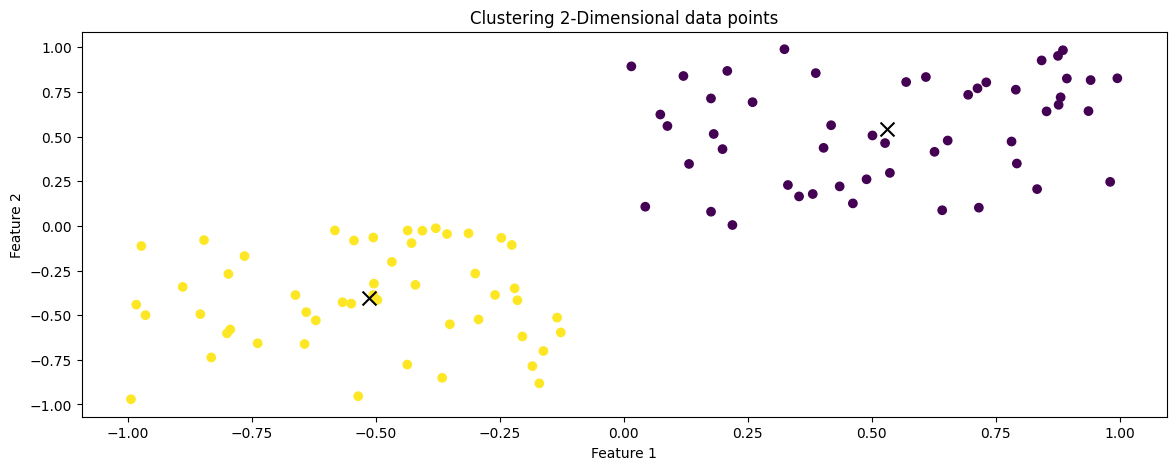

In [ ]:
# Plot the datapoints corresponding to clusters
plt.figure(figsize = (14, 5))
plt.scatter(two_dim[ : , 0], two_dim[ : , 1], c = labels_2d)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1],
            marker = 'x', c ='black', s = 100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering 2-Dimensional data points')
plt.show()

In the above plot, you may observe that we obtained two clusters with their respective cluster centers marked with `x` mark.

- The purple coloured cluster with the centroid located at `[-0.51390814, -0.40614835]`.

- The yellow coloured cluster with the centroid located at `[0.53088384, 0.54057735]`.




---

#### Activity 4: Cluster Visualisation using Interactive Plot

We can also obtain an interactive scatter plot using `plotly.express`. It enables us to know the coordinates of a datapoint when we hover the mouse pointer over the respective datapoint on the plot.

For interactive plot, import `plotly.express` module.

In [ ]:
# Import the required module for interactive plot.
import plotly.express as px

Next, use `scatter()` function  of `plotly.express` module to obtain an interactive scatter plot for the clusters determined by the K-Means estimator. Pass the following parameters to this `scatter()` function:

- Entire dataset: `two_dim`

- The x-axis data-points: `x = two_dim[:, 0]`

- The y-axis data-points: `y = two_dim[:, 1]`

- To colour code the datapoints with respect to the cluster, pass `color = labels_2d`

- To select the colour palette in the `plotly`,  pass `color_continuous_scale = geyser`

**Note:** You can visit this [Plotly](https://plotly.com/python/builtin-colorscales/) website to explore various colour palette options for `color_continuous_scale` parameter.

You can get more details on `scatter()` function of `plotly.express` module using the `help()` function.

In [ ]:
# Plot Interactive Plot using Plotly
fig = px.scatter(two_dim, x = two_dim[ :, 0], y = two_dim[ :, 1],
                 color = labels_2d, color_continuous_scale = 'geyser'
                 )
fig.show()

---

#### Activity 5: Euclidean Distance for n-dimensional Dataset

For one-dimensional dataset, the K-means algorithm used absolute distance to calculate the distance between two data points. However, n-dimensional dataset, K-means clustering uses the **Euclidean Distance** method to find out the distance between the points.

**The Pythagoras theorem:**

The Pythagoras theorem states that *in right triangles, the squared length of the hypotenuse equals the sum of squared lengths of other sides.*

<center>
<img src ="https://s3-whjr-v2-prod-bucket.whjr.online/f835c872-fec5-41b7-98c4-53122d8ced81.jpg"/></center>



Consider the points A: $(x_1 , y_1)$, and B: $(x_2 , y_2)$. in a 2-dimensional cartesian space.

<center>
<img src = https://s3-whjr-v2-prod-bucket.whjr.online/bfcf44d3-a56a-4b21-9b9d-ecb32676d77a.png height=500></center>

The **Euclidean Distance** between these points can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem:

\begin{align}
  AB^2 = AO^2 + OB^2  
\end{align}

\begin{align}
  AB = \sqrt{AO^2 + OB^2}  
\end{align}

<br>

\begin{align}
  AB = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }
\end{align}

<br>


**Generalising the Euclidean Distance for n-dimensions**:

Consider two points $p$ and $q$ in $n$-dimensional space represented by coordinates:

\begin{align}
  p = (p_0, p_1,\dots, p_n)
\end{align}


\begin{align}
  q = (q_0, q_1, \dots, q_n)
\end{align}

The Euclidean distance between these two points can be calculated using as an extension of Pythagoras theorem.


\begin{align}
  d(p,q) = \sqrt{\sum_{i = 1}^{n} (p_i - q_i)^2}
\end{align}

Where,

> $p,q$ are two points in n-dimensional space

> $p_i$, $q_i$ are Euclidean vectors

> $n$ is the n-dimensional space


For points $(x_1,y_1,z_1)$ and $(x_2,y_2,z_2)$ in 3-dimensional space,

the Euclidean distance between them is $\sqrt{(x_2−x_1)^2 + (y_2−y_1)^2 + (z_2−z_1)^2}$.

For example,

- The Euclidean distance between $(1,3)$ and $(2,0)$ is:
  
  $\sqrt{(2-1)^2 + (0-3)^2}=\sqrt{1 + 9} =\sqrt{10}$

- The Euclidean distance between $(−1,2,3)$ and $(4,0,−3)$ is:

   $\sqrt{(4-(-1))^2 + (0-2)^2 + (-3-3)^2}=\sqrt{25+4+36}=\sqrt{65}$

In this way, the K-Means algorithm uses Euclidean distance to calculate the distance between centroid and data points to form a cluster.

We will stop here. In the next class, we will discuss different methods by which we can select an optimal number of clusters (`K`) for K-Means clustering.
